In [ ]:
import numpy as np # importing all the essential libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Customer Churn.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_new = df.copy()

In [ ]:
df_new.TotalCharges = pd.to_numeric(df_new.TotalCharges, errors='coerce')
df_new.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_new.loc[df_new['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Deleting all the rows with null values in it

In [ ]:
df_new.dropna(how = 'any', inplace = True)

In [ ]:
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_new.shape

(7032, 21)

In [ ]:
print(df_new['tenure'].max())

72


Making bins out of the tenure as it is the main feature for a churn prediction in this case 

In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_new['tenure_group'] = pd.cut(df_new.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
df_new['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Droping the unnecessary columns to make the data more clean and compact for a better analysis.

In [ ]:
df_new.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


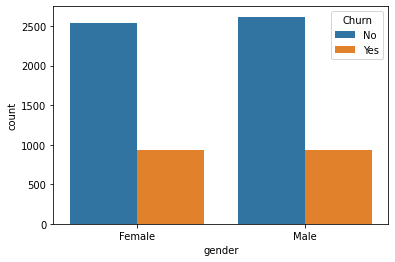

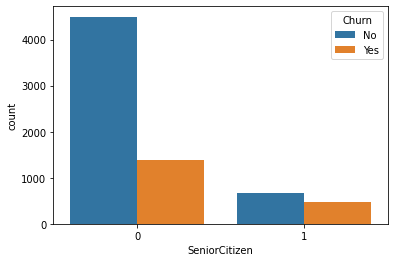

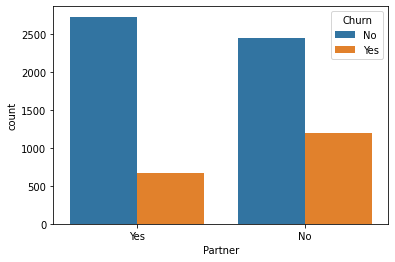

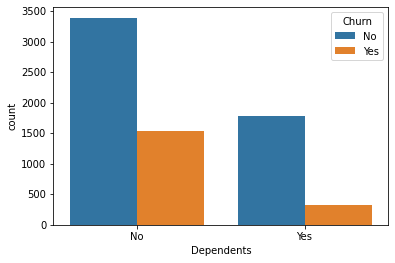

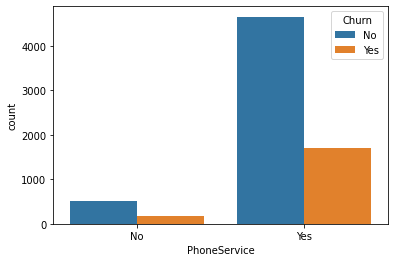

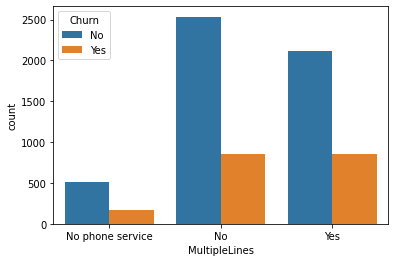

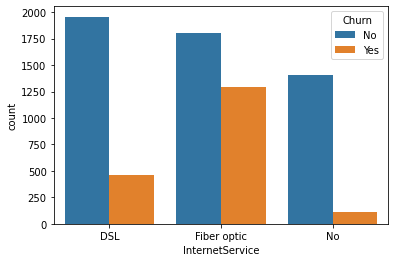

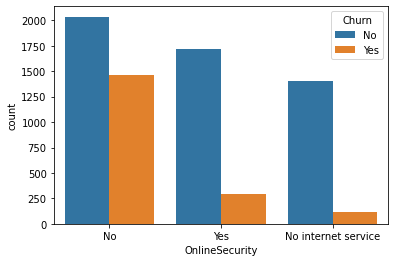

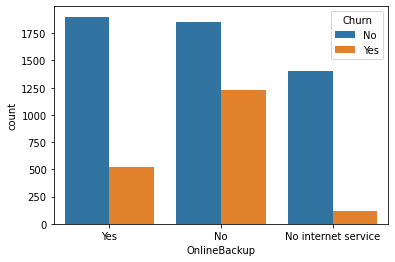

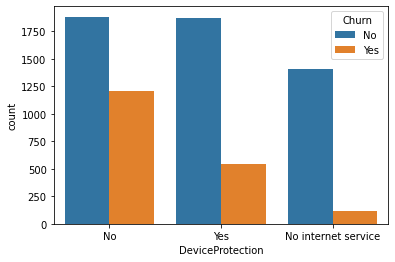

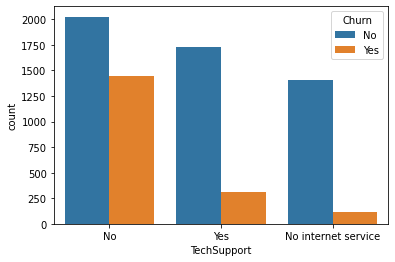

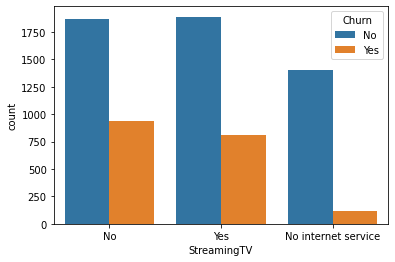

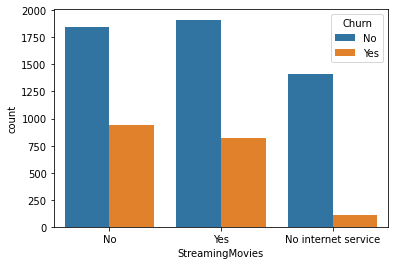

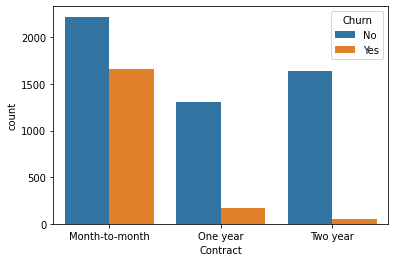

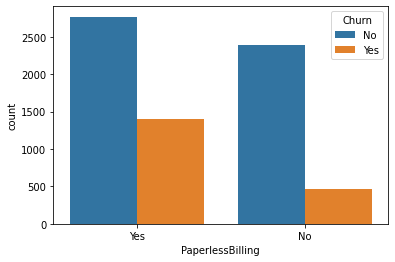

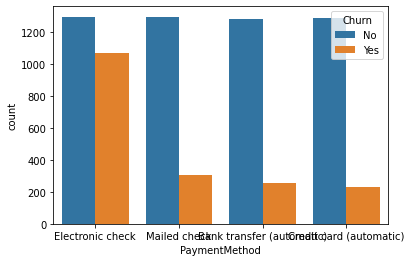

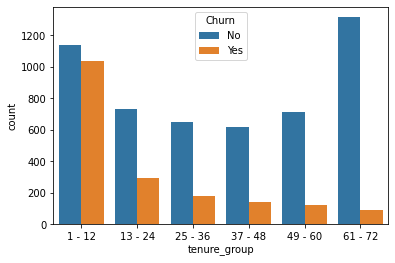

In [ ]:
for i, predictor in enumerate(df_new.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_new, x=predictor, hue='Churn')

In [ ]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [ ]:
df_new['Churn'] = np.where(df_new.Churn == 'Yes',1,0)
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Making all the categorical values into dummies variables for the better processing of the data

In [ ]:
df_new_dummies = pd.get_dummies(df_new)
df_new_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


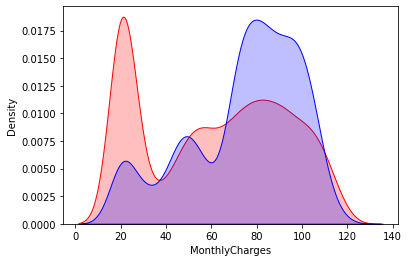

In [ ]:
MC = sns.kdeplot(df_new_dummies.MonthlyCharges[(df_new_dummies["Churn"] == 0) ],
                color="Red", shade = True)
MC = sns.kdeplot(df_new_dummies.MonthlyCharges[(df_new_dummies["Churn"] == 1) ],
                ax =MC, color="Blue", shade= True)

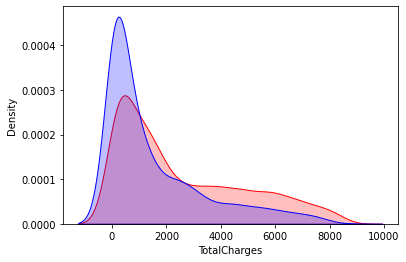

In [ ]:
TC = sns.kdeplot(df_new_dummies.TotalCharges[(df_new_dummies["Churn"] == 0) ],
                color="Red", shade = True)
TC = sns.kdeplot(df_new_dummies.TotalCharges[(df_new_dummies["Churn"] == 1) ],
                ax =TC, color="Blue", shade= True)

<AxesSubplot:>

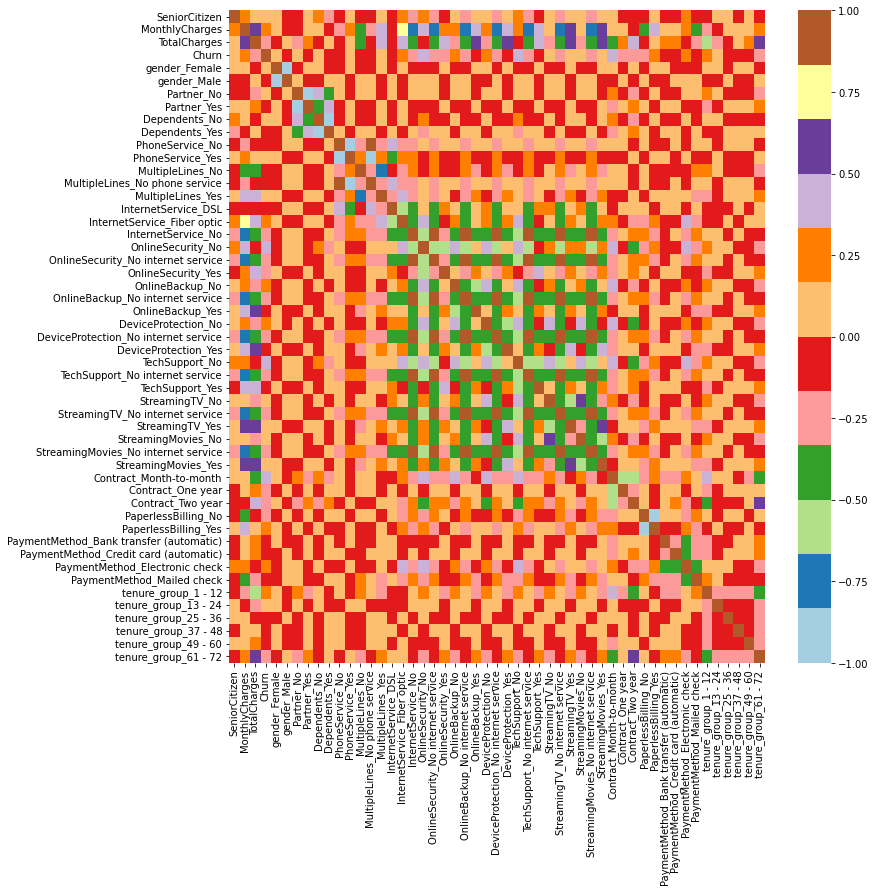

In [ ]:
plt.figure(figsize=(12,12)) #heat map to better understand the relation between churn and other factors
sns.heatmap(df_new_dummies.corr(), cmap="Paired")

In [1]:
#defining all the machine learning models for the analysis and model building
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN  # library for increasing accuracy as in it makes the data set more discrete and more smooth

In [ ]:
df_new_dummies.to_csv('analyse.csv')

In [ ]:
df1=pd.read_csv("analyse.csv")
df1.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df1=df1.drop('Unnamed: 0',axis=1)
x=df1.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df1['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<h3>Decision Tree Classifier</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50) # measure quality of split
dtmodel.fit(x_train, y_train) 

DecisionTreeClassifier(random_state=50)

In [ ]:
dt_pred = dtmodel.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1028
           1       0.48      0.49      0.48       379

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



<h6>precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 score = harmonic mean of precision and recall</h6>

In [ ]:
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_accuracy

71.86

<h6>Smoteenn + Decision Tree

In [ ]:
sm = SMOTEENN()
X_new, y_new = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_new, y_new,test_size=0.2)

In [ ]:
dtmodel_smote = DecisionTreeClassifier(criterion = "gini", random_state = 50) # measure quality of split

In [ ]:
dtmodel_smote.fit(xr_train, yr_train) 

DecisionTreeClassifier(random_state=50)

In [ ]:
dt_predict_smote = dtmodel_smote.predict(xr_test)
dt_predict_smote

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
dtmodel_smote.score(xr_test, yr_test)

0.9439171699741156

In [ ]:
print(metrics.classification_report(yr_test, dt_predict_smote))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       489
           1       0.95      0.95      0.95       670

    accuracy                           0.94      1159
   macro avg       0.94      0.94      0.94      1159
weighted avg       0.94      0.94      0.94      1159



In [ ]:
dt_accuracy_smote = (dtmodel_smote.score(xr_test, yr_test))*100
dt_accuracy_smote

94.39171699741155

<h3>Random Forest Classifier</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0) # n_estimators is no. of trees in forest
rfmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
rf_pred = rfmodel.predict(x_test)

In [ ]:
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
rf_accuracy

78.89

In [ ]:
print(classification_report(y_test, rf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1028
           1       0.63      0.52      0.57       379

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<h6>Smoteenn + Random Forest

In [ ]:
sm = SMOTEENN()
X_new, y_new = sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_new, y_new,test_size=0.2)

In [ ]:
rfmodel_smote = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0) # n_estimators is no. of trees in forest
rfmodel_smote.fit(xr_train, yr_train) 

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
rf_predict_smote = rfmodel_smote.predict(xr_test1)

In [ ]:
rf_accuracy_smote = (rfmodel_smote.score(xr_test1, yr_test1))*100
rf_accuracy_smote

97.41379310344827

In [ ]:
print(metrics.classification_report(yr_test1, rf_predict_smote))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       516
           1       0.99      0.97      0.98       644

    accuracy                           0.97      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.97      0.97      0.97      1160



In [ ]:
print(metrics.confusion_matrix(yr_test1, rf_predict_smote))

[[507   9]
 [ 21 623]]


<h3>Logistic Regression</h3>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(random_state=50)
logmodel.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [ ]:
log_pred = logmodel.predict(x_test)

In [ ]:
log_accuracy = round(metrics.accuracy_score(y_test, log_pred) * 100, 2)
log_accuracy

80.24

In [ ]:
print(classification_report(y_test, log_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1028
           1       0.67      0.52      0.59       379

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



<h6>Smoteenn + Logistic Regression

In [ ]:
sm = SMOTEENN()
X_new, y_new = sm.fit_resample(x,y)

In [ ]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_new, y_new,test_size=0.2)

In [ ]:
logmodel_smote = LogisticRegression(random_state=50)
logmodel_smote.fit(xr_train2,yr_train2)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [ ]:
log_pred_smote = logmodel_smote.predict(xr_test2)

In [ ]:
log_accuracy_smote = (logmodel_smote.score(xr_test2, yr_test2))*100
log_accuracy_smote

92.67872523686476

In [ ]:
print(metrics.classification_report(yr_test2, log_pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       548
           1       0.92      0.94      0.93       613

    accuracy                           0.93      1161
   macro avg       0.93      0.93      0.93      1161
weighted avg       0.93      0.93      0.93      1161



In [ ]:
print(metrics.confusion_matrix(yr_test2, log_pred_smote))

[[500  48]
 [ 37 576]]


<h3>Support Vector Machine</h3>

In [ ]:
# from sklearn.svm import SVC

In [ ]:
# svcmodel = SVC(kernel='linear', random_state=50, probability=True) #kernel math of svm define shape of output; to take probability value or not
# svcmodel.fit(x_train,y_train)

In [ ]:
# svc_pred = svcmodel.predict(x_test)

In [ ]:
# svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
# svc_accuracy

In [ ]:
# print(classification_report(y_test, svc_pred, labels=[0,1]))

<h6>Smoteenn + SVC

In [ ]:
# sm = SMOTEENN()
# X_new, y_new = sm.fit_resample(x,y)

In [ ]:
# xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_new, y_new,test_size=0.2)

In [ ]:
# svcmodel_smote = SVC(kernel='linear', random_state=50, probability=True) #kernel math of svm define shape of output; to take probability value or not
# svcmodel_smote.fit(xr_train3,yr_train3)

In [ ]:
# svc_pred_smote = svcmodel_smote.predict(xr_test3)

In [ ]:
# svc_accuracy_smote = (svcmodel_smote.score(xr_test3, yr_test3))*100
# svc_accuracy_smote

In [ ]:
# print(metrics.classification_report(yr_test3, svc_pred_smote))

In [ ]:
# print(metrics.confusion_matrix(yr_test3, svc_pred_smote))

<h3>K-Nearest Neighbor</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p=2 - Euclidean distance, p=1 - Manhattan Distance
knnmodel.fit(x_train, y_train) 

In [ ]:
knn_pred = knnmodel.predict(x_test)

In [ ]:
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
knn_accuracy

In [ ]:
print(classification_report(y_test, knn_pred, labels=[0,1]))

<h6>Smoteenn + K-Nearest Neighbor

In [ ]:
sm = SMOTEENN()
X_new, y_new = sm.fit_resample(x,y)

In [ ]:
xr_train4,xr_test4,yr_train4,yr_test4=train_test_split(X_new, y_new,test_size=0.2)

In [ ]:
knnmodel_smote = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p=2 - Euclidean distance, p=1 - Manhattan Distance
knnmodel_smote.fit(xr_train4, yr_train4) 

In [ ]:
knn_pred_smote = knnmodel_smote.predict(xr_test4)

In [ ]:
knn_accuracy_smote = (knnmodel_smote.score(xr_test4, yr_test4))*100
knn_accuracy_smote

In [ ]:
print(metrics.classification_report(yr_test4, knn_pred_smote))

In [ ]:
print(metrics.confusion_matrix(yr_test4, knn_pred_smote))

In [ ]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression with Smoteenn', 'K-Nearest Neighbor','K-Nearest Neighbor with Smoteenn','Decision Tree', 'Decision Tree with Smoteenn','Random Forest','Random Forest with Smoteenn'],
    'Score': [log_accuracy, log_accuracy_smote, knn_accuracy, knn_accuracy_smote, dt_accuracy, dt_accuracy_smote, rf_accuracy, rf_accuracy_smote]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

So the highest accuracy is of the RF classifier with SMOTEENN.

In [ ]:
import pickle

In [ ]:
modelname = 'model.sav'

In [ ]:
pickle.dump(rfmodel_smote, open(modelname, 'wb'))

In [ ]:
load_model = pickle.load(open(modelname, 'rb'))

In [ ]:
model_score_r1 = load_model.score(xr_test1, yr_test1)*100
model_score_r1